# Regression - Prediction of Store Sales

### Technical goals of this project
1 . Understand the data

2 . Perform Exploratory Data Analysis

3 . Carry out all Data Mining tasks

4 . Identify the salient features that will determine the best results

5 . Perform model evaluation to select th best algorithms 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Data Preparation and Preprocessing

In [3]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [4]:
df.shape

(14204, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type'>

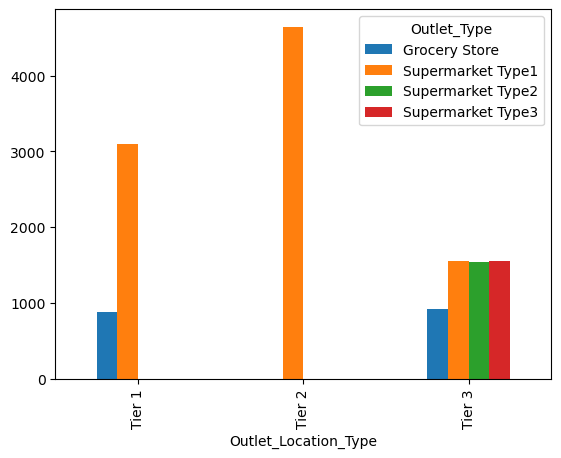

In [7]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Type']).plot(kind='bar')

The above chart shows us that Tier 3 location type has all types of outlet but Tier 1 and 2 doesnt have all types of outlet.

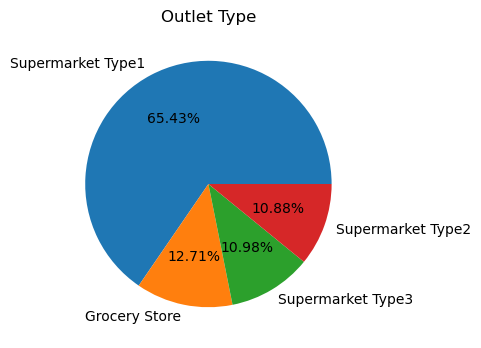

In [8]:
values = df.Outlet_Type.value_counts()
fig,ax=plt.subplots(figsize=(13,4))
plt.pie(x=values,labels=values.index,autopct='%.2f%%')

plt.title('Outlet Type')
plt.show()

1 . 65.43% of outlet types are SuperMarket Type 1

2 . 12.71% of outlet types are Grocery store

3 . 10.98% of outlet types are SuperMarket Type 3 and 

4 . 10.88% of outlet types are SuperMarket Type 2

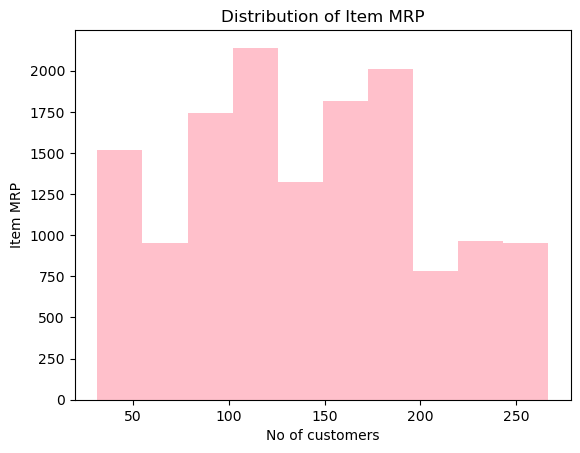

In [9]:
plt.hist(df.Item_MRP,color='pink')
plt.xlabel('No of customers')
plt.ylabel('Item MRP')
plt.title('Distribution of Item MRP')
plt.show()

##### 1 . The distribution of the customers with respect to Item MRP range from $80 to $200. So Concentrate on these range price of items to improve the better sales of the business

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
obj=df.select_dtypes(include='object')
for i in obj:
    df[i]=le.fit_transform(df[i])

In [14]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [15]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002869
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.013261
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.018719
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.135247
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.017048
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.049135
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.060517
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.089367


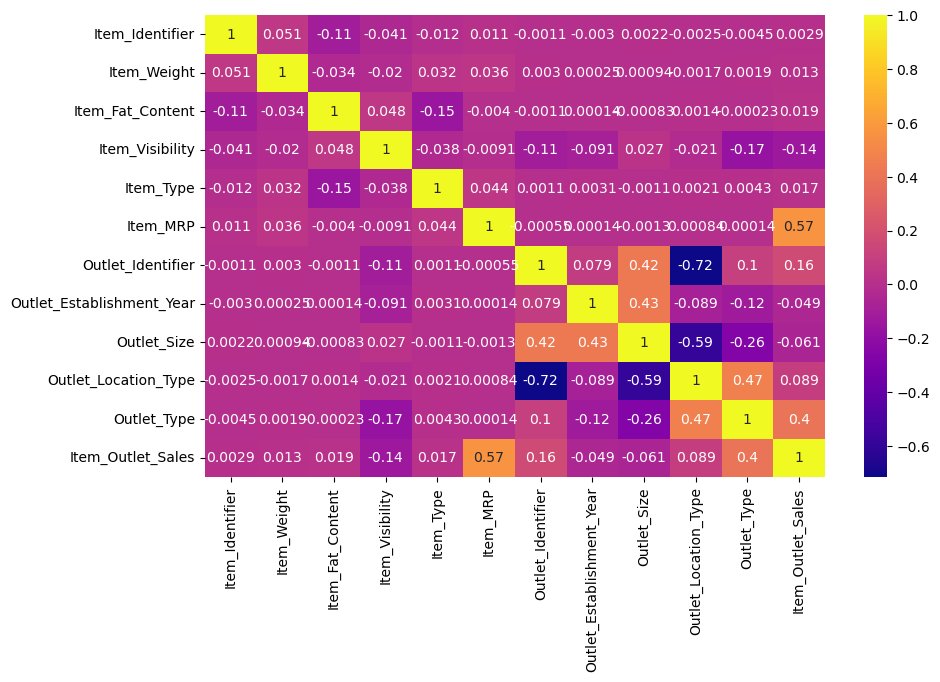

In [16]:
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

## Selecting the salient features that will determine the best results

In [17]:
df = df.drop(df[['Item_Identifier']],axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,NaN
14200,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,NaN
14201,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,NaN
14202,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,NaN


In [18]:
df_c = df
columns = df_c.columns
columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

## Scaling

In [19]:
# Extract the features
X = df.iloc[:, :-1].values

# Perform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the scaled data
print(X_scaled)

[[-0.75101393 -0.73921202 -1.11587958 ... -0.57514446 -1.3692863
  -0.25270242]
 [-1.47765312  1.35279186 -1.04942649 ... -0.57514446  1.09156555
   1.00276633]
 [ 1.01183853 -0.73921202 -1.10121932 ... -0.57514446 -1.3692863
  -0.25270242]
 ...
 [-0.60052652 -0.73921202  0.06638835 ...  0.90534701 -0.13886037
  -0.25270242]
 [ 0.53887812  1.35279186 -0.11501486 ...  0.90534701 -0.13886037
  -0.25270242]
 [-0.70801753  1.35279186  0.70793338 ...  0.90534701 -0.13886037
  -0.25270242]]


# Baseline: Linear Regression (For comparison)

In [20]:
null_values = df[df.isnull().any(axis=1)]

In [21]:
null_values

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
8524,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
8525,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
8526,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
8527,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,1,0.013496,13,141.3154,8,1997,2,0,1,NaN
14200,7.600,1,0.142991,15,169.1448,3,2009,1,2,2,NaN
14201,10.000,0,0.073529,8,118.7440,7,2002,2,1,1,NaN
14202,15.300,1,0.064709,3,214.6218,2,2007,2,1,1,NaN


In [22]:
df = df.dropna()

In [23]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis=1)

In [24]:
# define lists to gather results for plotting later
results, names = list(), list()

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((6818, 10), (1705, 10))

In [26]:
model = LinearRegression()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('cart')
# report performance
print('Coeffiecient of determination: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Coeffiecient of determination: 0.500 (0.018)


In [27]:
s_model = LinearRegression().fit(x_train, y_train)
s_r_sq=s_model.score(x_train, y_train)

In [42]:
y_pred = s_model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 934.00925749  719.37565514  920.93658887 ...  391.29136964 1161.4757936
 1639.96352058]


In [29]:
print('coefficient of determination:', s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

coefficient of determination: 0.4976652353320504
intercept: 5934.787590390363
slope: [-2.24244692e+00  7.13621262e+01 -2.05322078e+03  2.54338433e-01
  1.55811764e+01  5.89236138e+01 -3.47503242e+00 -4.33307435e+01
 -7.17447978e+01  8.35855690e+02]


# Bagging with Random Forest (For comparison)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('rf')
# report performance
print('Coeffiecient of determination: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Coeffiecient of determination: 0.557 (0.024)


# Boosting with Adaboost

In [33]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y,  cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('ada')
# report performance
print('Coeffiecient of determination: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Coeffiecient of determination: 0.457 (0.061)


# Stacking

In [35]:
# required Python libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [36]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [37]:
# define the model
model = get_stacking()


# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X, y , cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('stacking')
# report performance
print('Coeffiecient of determination: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Coeffiecient of determination: 0.534 (0.019)


## Linear Regression Model Evaluation

In [38]:
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('MSE:',MSE)
print('MAE:',MAE)
print('RMSE:',RMSE)

MSE: 1303090.913923465
MAE: 855.9566777719574
RMSE: 1141.5300757857697


## Business Interpretation

From the above calculations and the models we can say that BAGGING WITH RANDOM FOREST algorithm has the highest co-efficient of 

Determination = 0.557  followed by Stacking with 0.534 and we can interpret that the is performing averagely good we cant say it

is poor but it is predicting good , The Root mean squared error(RMSE) value is 1141.53  is the measure of the difference between 

the predicted and actual value. Generally a lower RMSE value indicates the better fit of the model to the data. The obtained 

error metrics suggests that the model is relatively good fit to the data